In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
gold_data = pd.read_csv('gold_price.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
## for knowing till which date we have data

In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data = gold_data.drop(columns=['Date'])
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [8]:
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

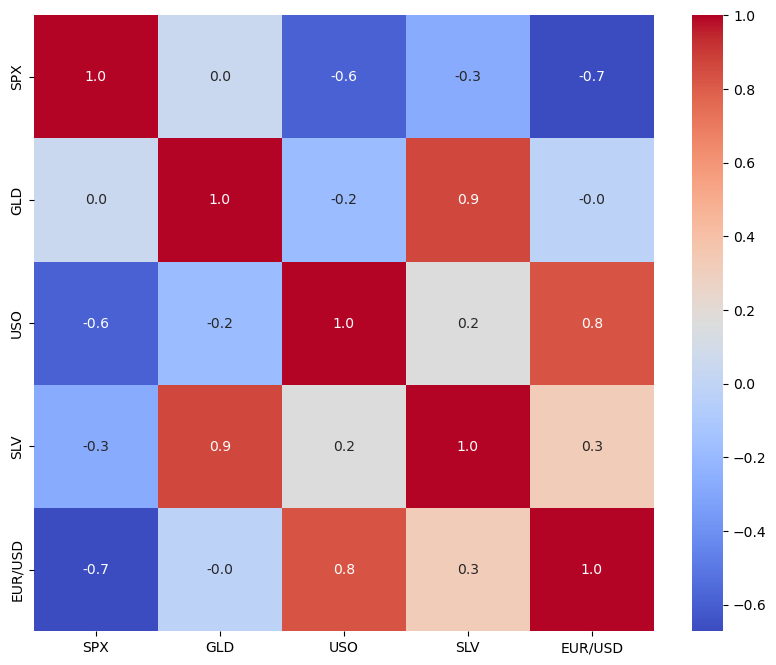

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(gold_data.corr(), annot=True, cmap='coolwarm', fmt='.1f')

<Axes: ylabel='Count'>

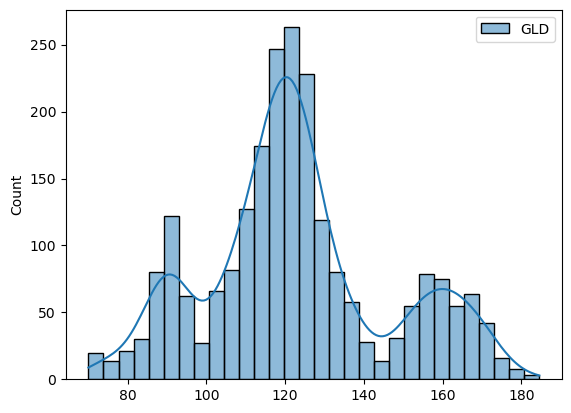

In [14]:
## Checking the distribution of the GLD prices
sns.histplot([gold_data['GLD']], bins=30, kde=True)

In [15]:
## splitting the features and target variable
X = gold_data.drop(columns=['GLD']) ## as the date is already dropped
Y = gold_data['GLD']

In [26]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)

In [25]:
Y_train

1193    135.520004
434     109.699997
1018    160.539993
972     151.619995
1968    111.830002
           ...    
1697    108.410004
332      93.129997
1293    119.820000
1104    161.539993
1945    124.300003
Name: GLD, Length: 1832, dtype: float64

In [17]:
model = RandomForestRegressor(n_estimators = 100)

In [18]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [19]:
## predicting on train data

train_predictions = model.predict(X_train)
train_r2 = r2_score(Y_train, train_predictions)
train_mae = mean_absolute_error(Y_train, train_predictions) 
print(f'Train R2 Score: {train_r2}')
print(f'Train Mean Absolute Error: {train_mae}')

## predicting on test data

predictions = model.predict(X_test)
test_r2 = r2_score(Y_test, predictions)
test_mae = mean_absolute_error(Y_test, predictions)
print(f'Test R2 Score: {test_r2}')
print(f'Test Mean Absolute Error: {test_mae}')

Train R2 Score: 0.998339185920372
Train Mean Absolute Error: 0.4979514461244531
Test R2 Score: 0.9926562876278131
Test Mean Absolute Error: 1.2237960141048017


In [24]:
Y_test.values

array([ 89.980003, 160.5     , 164.479996,  78.860001, 161.520004,
       165.160004, 114.      , 126.089996, 121.68    , 111.150002,
       125.029999,  87.419998, 105.370003,  88.800003, 164.440002,
       116.120003,  86.989998, 114.470001, 121.309998, 120.959999,
        87.989998, 122.120003, 100.730003, 121.559998, 154.649994,
        76.18    , 121.900002, 126.269997, 127.150002, 127.699997,
       138.539993, 102.269997, 135.119995, 151.440002, 177.080002,
       128.669998, 118.519997, 114.769997, 159.699997, 132.009995,
       169.399994, 124.150002, 130.369995, 124.620003, 179.100006,
       163.350006,  83.870003, 129.600006,  72.220001, 177.869995,
       113.660004, 148.220001,  89.220001, 116.040001,  90.690002,
       115.519997, 111.540001, 104.389999, 110.449997, 130.279999,
        89.099998, 173.960007, 125.980003, 138.369995, 119.739998,
       128.070007,  85.809998, 125.580002, 115.800003, 124.889999,
        93.260002, 124.010002, 117.599998, 136.380005, 129.470

In [21]:
predictions

array([ 90.79719919, 159.29230019, 165.2441001 ,  81.36469916,
       165.52460088, 165.70120128, 114.80010086, 125.55000105,
       120.64100053, 110.2036988 , 124.51770111,  87.24039855,
       105.44259908,  90.95059878, 163.48740157, 117.59269993,
        88.40949954, 114.20460057, 121.21970052, 121.22680103,
        87.48620046, 122.14980025, 100.50089931, 121.23009947,
       154.59890112,  76.3353994 , 120.68089902, 129.19659801,
       127.96920057, 127.32679844, 139.31140167, 102.21369936,
       134.64830018, 147.30870057, 177.11259925, 127.26810193,
       117.95299845, 114.29210145, 158.05800047, 131.16849875,
       166.49070088, 125.38979949, 130.62830114, 124.85550019,
       177.44099993, 162.80249883,  85.24450002, 129.46789843,
        74.11870111, 177.42110019, 114.66019998, 144.8133999 ,
        89.14589945, 117.15560087,  91.13799912, 117.16709984,
       112.0971013 , 104.33679924, 113.52570133, 131.97299874,
        90.05499978, 164.75660079, 125.38030009, 135.46

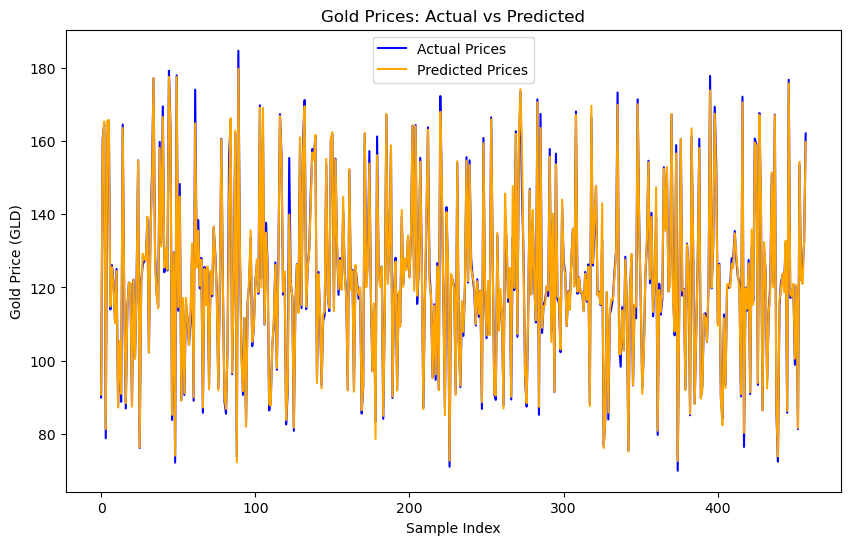

In [27]:
## plotting 
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='orange') 
plt.title('Gold Prices: Actual vs Predicted')
plt.xlabel('Sample Index')  
plt.ylabel('Gold Price (GLD)')
plt.legend()    
plt.show()